In [36]:
from datasets import load_dataset, ClassLabel
import pandas as pd
from pathlib import Path

In [24]:
# Load the dataset from hugging face
# See: https://huggingface.co/datasets/BEE-spoke-data/consumer-finance-complaints

# The consumer-finance-complaints dataset only has a train split,
# so we use the train_test_split method to split it into train and test
dataset = load_dataset("BEE-spoke-data/consumer-finance-complaints",
                       split="train") #.train_test_split(test_size= 0.2,shuffle= True, seed= 23)
#splits = ["train", "test"]

In [26]:
# Filter rows based on multiple column values
filtered_dataset = dataset.filter(
    lambda row: row["Company"] == "CITIBANK, N.A."
    and row["Product"] in ["Credit card", "Mortgage"]
    and row["Consumer complaint narrative"] is not None
)

Filter: 100%|██████████| 4707579/4707579 [02:11<00:00, 35729.26 examples/s]


In [27]:
filtered_columns_dataset = filtered_dataset.remove_columns(
    [col for col in filtered_dataset.column_names
     if col not in ["Consumer complaint narrative", "Product"]]
)
# Limit to 1000 rows
#filtered_dataset_1000 = filtered_columns_dataset.select(range(min(len(filtered_columns_dataset), 1000)))
filtered_columns_dataset

Dataset({
    features: ['Product', 'Consumer complaint narrative'],
    num_rows: 6640
})

In [28]:
# Convert the dataset to a pandas DataFrame
df = filtered_columns_dataset.to_pandas()

# Define the data folder and CSV file path
data_folder = Path("data")

# Use pathlib to define a file path
output_path = data_folder / "filtered_dataset.csv"

# Export the DataFrame to CSV
df.to_csv(output_path, index=False)

print(f"Filtered dataset successfully saved to {output_path}")

Filtered dataset successfully saved to data/filtered_dataset.csv


In [29]:
# Checking dataset:
# Define the file path
file_path = Path("data/filtered_dataset.csv")

# Load the CSV file into a pandas DataFrame
loaded_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df = loaded_data[["Consumer complaint narrative",
             "Product"]]
df

,Consumer complaint narrative,Product
0,We applied for the Citi Advantage card for a p...,Credit card
1,"On XX/XX/XXXX, I made an online payment to Cos...",Credit card
2,I am appointed by Probate Court as administrat...,Credit card
3,"In early XXXX, maybe around the XXXX or XXXX, ...",Credit card
4,"On or around XX/XX/XXXX, I reached out to Citi...",Credit card
...,...,...
6635,I have worked on this problem with Citimortgag...,Mortgage
6636,"I have a Citibank mastercard credit card, whic...",Credit card
6637,I purchased an Ipod from BestBuy XX/XX/XXXX an...,Credit card
6638,"In short, I am stuck in this re-fi application...",Mortgage


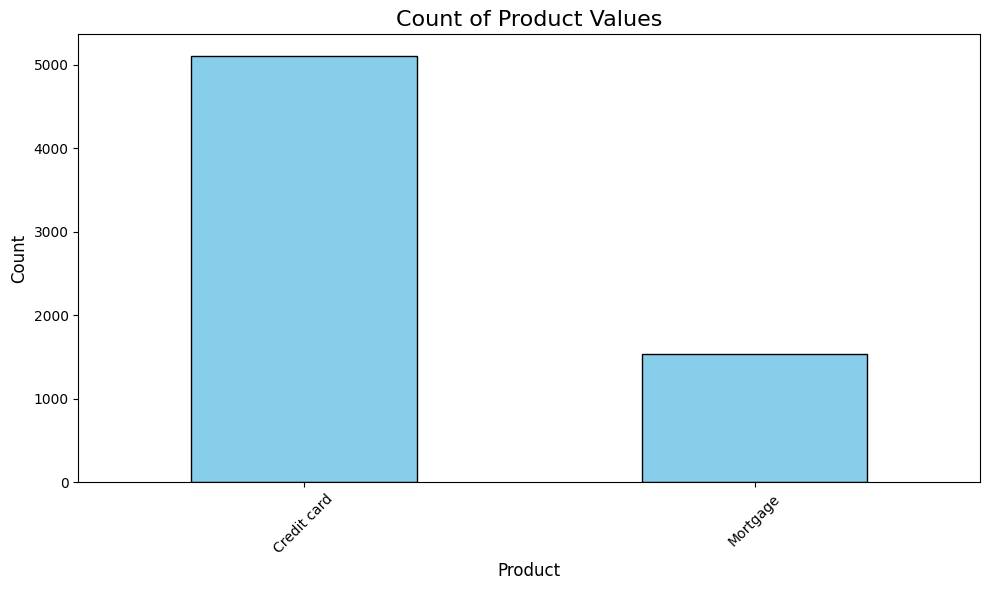

In [30]:
import matplotlib.pyplot as plt

# Count occurrences of each Product value
product_counts = df["Product"].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 6))
product_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Add labels and title
plt.title("Count of Product Values", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
dataset = load_dataset("csv", data_files="data/filtered_dataset.csv")

# Inspect the unique values in the 'Product' column
product_classes = dataset["train"].unique("Product")

# Convert the 'Product' column to a ClassLabel feature
product_label = ClassLabel(names=product_classes)
dataset = dataset.cast_column("Product", product_label)

# Perform the train-test split with stratification
dataset = dataset["train"].train_test_split(test_size= 0.2,
                                            shuffle= True,
                                            seed= 23,
                                            stratify_by_column='Product'
                                            )

# Verify the train and test splits
splits = ["train", "test"]

In [40]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Product', 'Consumer complaint narrative'],
        num_rows: 5312
    })
    test: Dataset({
        features: ['Product', 'Consumer complaint narrative'],
        num_rows: 1328
    })
})